In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset of Diabetes.csv')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   str    
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   str    
dtypes: float64(8), int64(4), str(2)
memory usage: 109.5 KB


In [5]:
df.select_dtypes(['str', 'object'])

,Gender,CLASS
0,F,N
1,M,N
2,F,N
3,F,N
4,M,N
...,...,...
995,M,Y
996,M,Y
997,M,Y
998,M,Y


In [6]:
df_num = df.select_dtypes(['int64', 'float64'])
df_num

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,502,17975,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,735,34221,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,420,47975,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,680,87656,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,504,34223,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0
996,671,876534,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2
997,669,87654,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4
998,99,24004,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5


In [7]:
df['Gender'] = df['Gender'].str.upper()

In [8]:
df['Gender'].value_counts()

Gender
M    565
F    435
Name: count, dtype: int64

In [9]:
df_num.drop(columns=['ID', 'No_Pation'], inplace=True)


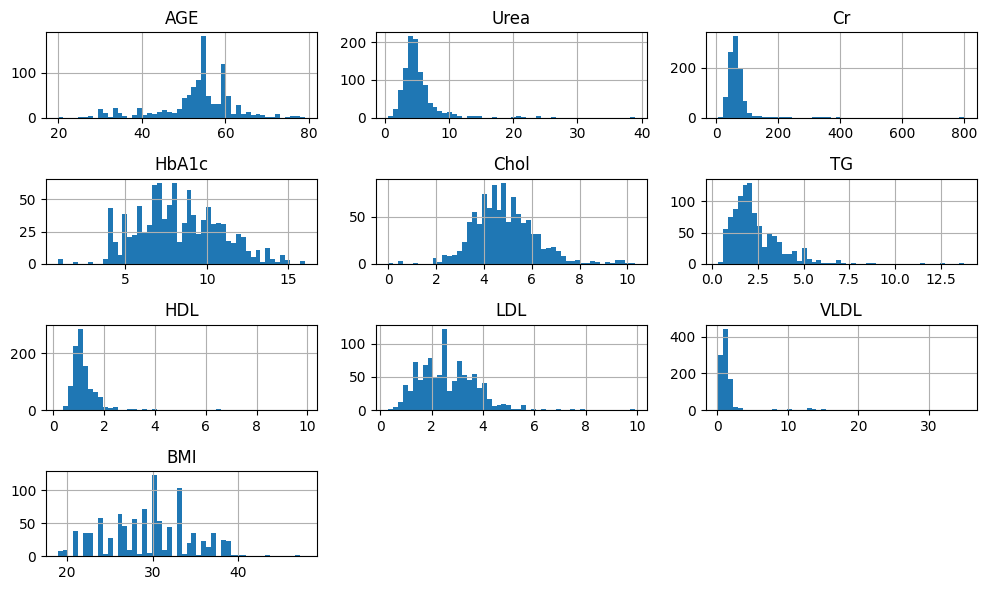

In [10]:
df_num.hist(bins=50, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [11]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
outliers = df_num[((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...,...
994,69,10.3,185,7.7,4.9,1.9,1.2,3.0,0.7,37.0
995,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0
996,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2
997,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4


In [12]:
df_num = df_num[~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index(drop=True)
df_num

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0
1,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0
2,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0
3,45,4.6,54,5.1,4.2,1.7,1.2,2.2,0.8,23.0
4,50,3.5,39,4.0,4.0,1.5,1.2,2.2,0.7,24.0
...,...,...,...,...,...,...,...,...,...,...
674,62,6.3,82,6.7,5.3,2.0,1.0,3.5,0.9,30.1
675,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0
676,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0
677,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0


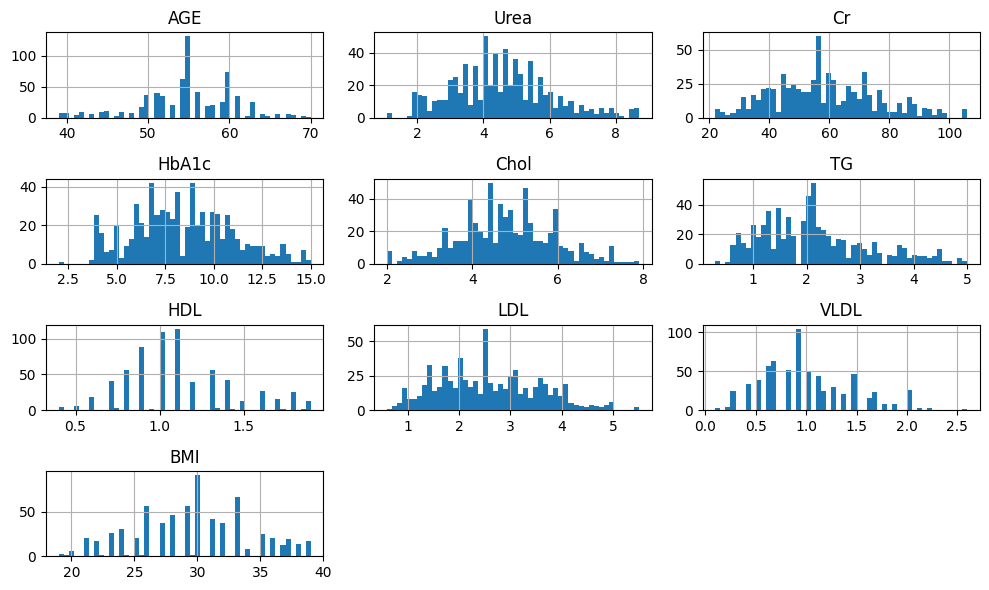

In [17]:
df_num.hist(bins=50, figsize=(10, 6))
plt.tight_layout()
plt.show()

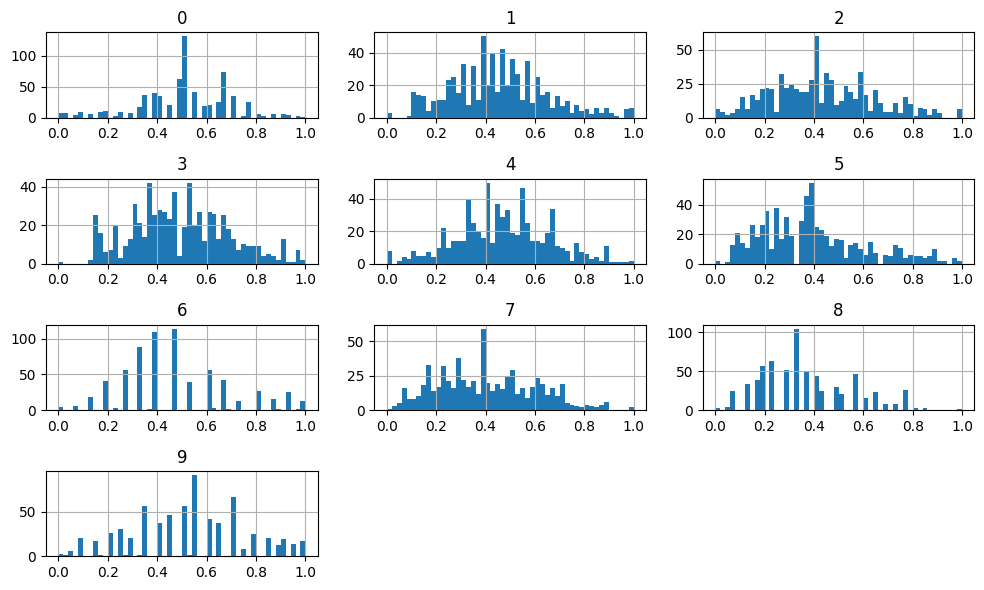

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_min = pd.DataFrame(scaler.fit_transform(df_num))
df_min.hist(bins=50, figsize=(10, 6))
plt.tight_layout()
plt.show()

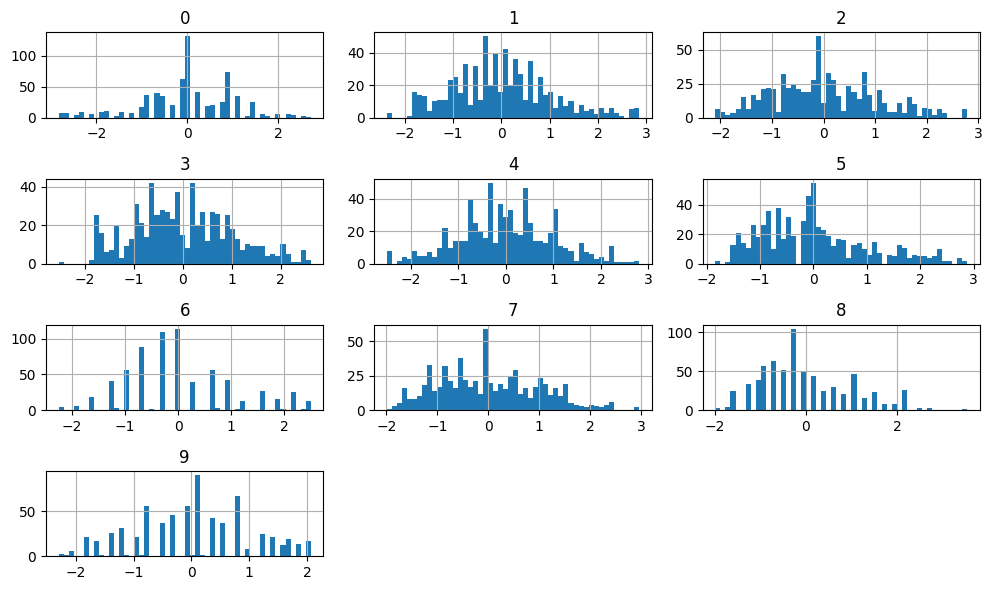

In [19]:
scaler = StandardScaler()
df_st = pd.DataFrame(scaler.fit_transform(df_num))
df_st.hist(bins=50, figsize=(10, 6))
plt.tight_layout()
plt.show()